<br></br>
# Data Mining and Decision Systems ACW
<br></br>
#### Student number: 201601628
<br>
<hr>

<a id="0"></a>
## Contents
<br>
<div style="line-height:2;">
<div style="line-height:2.5;"><a href="#4">....<h3 style="display: inline"> 0. Notebook Initialisation</h3></a></div>
<div style="line-height:2.5;"><a href="#1">....<h3 style="display: inline"> 1. Methodology</h3></a></div>
<div><a href="#11">........<h4 style="display: inline"> 1.1. CRISP DM</h4></a></div>
<div><a href="#111">............<h5 style="display: inline"> 1.1.1. Business Understanding</h5></a></div>
<div><a href="#112">............<h5 style="display: inline"> 1.1.2. Data Understanding</h5></a></div>
<div><a href="#113">............<h5 style="display: inline"> 1.1.3. Data Preperation</h5></a></div>
<div><a href="#114">............<h5 style="display: inline"> 1.1.4. Modeling</h5></a></div>
<div><a href="#115">............<h5 style="display: inline"> 1.1.5. Evaluation</h5></a></div>
<div style="line-height:2.5;"><a href="#116">............<h5 style="display: inline"> 1.1.6. Deployment</h5></a></div>
<div style="line-height:2.5;"><a href="#2">....<h3 style="display: inline">2. Results</h3></a></div>
<div style="line-height:2.5;"><a href="#3">....<h3 style="display: inline">3. Evaluation & Discussion</h3></a></div>
</div>
<br>
<hr>

<a id="4"></a>
## 0. Notebook Initialisation

In [1]:
## Import all libraries for use in notebook.
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np

from sklearn import model_selection, linear_model
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# Load the data and get some basic information for future use.
path = "data.csv" ## Relative path to train/test data.
rawData = pd.read_csv(path) ## Will reamin untouched for reference.
rawData.columns = [col.lower() for col in rawData.columns] ## Make headers lowercase to avoid some trivial errors.
df = rawData.copy() ## Working copy.

rawNRows = rawData.shape[0]
rawNCols = rawData.shape[1]
rawColNames = [colName.lower() for colName in rawData.columns.values] ## Convert colnames to lower for checking to avoid trivial errors.

rawData ## Show

,random,id,indication,diabetes,ihd,hypertension,arrhythmia,history,ipsi,contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


<a href="#0">[back to top]</a>

<a id="1"></a>
## 1. Methodology
<i style="font-size: 14px">Provide details on the methodology applied towards the data mining analysis undertaken, providing rationale for these steps.

This should detail how you went from the raw data provided to the chosen model(s), choice of model, and how this methodology helps address the problem domain.

Evidence to support the following of this methodology should be presented, especially any cases which required moving backwards in the process to readdress issues.
</i>

<a href="#0">[back to top]</a>

<a id="11"></a>
### &nbsp;&nbsp;&nbsp;&nbsp;1.1. CRISP DM
<img src="crisp-dm.png" style="max-height:400px">
<a href="#0">[back to top]</a>

<a id="111"></a>
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.1. Business Understanding
<i style="font-size: 14px">Focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan.</i>

<a href="#0">[back to top]</a>

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Problem Description
<div style="font-size: 14px">
<p>DOMAIN: Cardio-vascular medicine / healthcare</p>
<p>TYPE: Classification</p>
<p>INPUTS: Tabulated patient data</p>
<p>OUTPUTS:</p>
    <ul>
        <li>Risk</li>
        <li>No Risk</li>
    </ul>
<p>TERMINOLOGY/NUANCES:</p>
    <ul>
        <li>Risk</li>
        <li>No Risk</li>
    </ul>
</div>

<a id="112"></a>
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.2. Data Understanding
<i style="font-size: 14px">Starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.</i>

<a href="#0">[back to top]</a>

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Dictionary

<table>
    <tbody>
        <tr>
            <td>
                <p><strong>Attribute</strong></p>
            </td>
            <td>
                <p><strong>Value Type</strong></p>
            </td>
            <td>
                <p><strong>NumberOfValues</strong></p>
            </td>
            <td>
                <p><strong>Values</strong></p>
            </td>
            <td>
                <p><strong>Comment</strong></p>
            </td>
            <td>
                <p><strong>Non-clinical Description</strong></p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Random</p>
            </td>
            <td>
                <p>Real</p>
            </td>
            <td>
                <p>Number of Records</p>
            </td>
            <td>
                <p>Unique</p>
            </td>
            <td>
                <p>Real number of help in randomly sorting the data records</p>
            </td>
            <td>
                <p>Real number of&nbsp;help&nbsp;in randomly sorting the data records: Should be unique values.</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Id</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Max of Number of Records</p>
            </td>
            <td>
                <p>Unique to patient</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique values unless patient has multiple sessions</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique value per patient. Patient can have multiple sessions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Indication</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Four</p>
            </td>
            <td>
                <p>{a-f, asx, cva, tia}</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p><p> a-f :&nbsp;Atrial-Fibrillation</p>
                <p>asx&nbsp;:&nbsp;Asymptomatic Stenosis&nbsp;</p><p>cva&nbsp;: Cardiovascular Arrest</p>
                <p>tia&nbsp;:&nbsp;Transient Ischemic Attack ("mini-heart attack")</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Diabetes</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IHD</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Hypertension</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Arrhythmia</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from</p>
                <p>Arrhythmia (i.e. erratic heart beat)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Arrhythmia (i.e. erratic&nbsp;heart beat)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>History</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Has the patient a history of</p>
                <p>Cardiovascular interventions?</p>
            </td>
            <td>
                <p>Has the patient a history of Cardiovascular interventions?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IPSI</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Contra</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Label</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{risk, norisk}</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
        </tr>
    </tbody>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b style="color: red;">NOTE:</b>
<p style="font-size: 14px">"Session" is also included in the non-clinical description, but not included in the data dictionary.</p>
<br>
<table>
    <tr>
        <td>
            <p><strong>Attribute</strong></p>
        </td>
        <td>
            <p><strong>Value Type</strong></p>
        </td>
        <td>
            <p><strong>NumberOfValues</strong></p>
        </td>
        <td>
            <p><strong>Values</strong></p>
        </td>
        <td>
            <p><strong>Comment</strong></p>
        </td>
        <td>
            <p><strong>Non-clinical Description</strong></p>
        </td>
    </tr>
    <tr>
        <td>
            <p>Session</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Max Number of Records (assumed)</p>
        </td>
        <td>
            <p>Unique to patient</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Anonymous patient session identifier.</p>
        </td>
    </tr>
</table>

<p><b>Step 1. </b>Check data for conformity to dictionary.</p>

(a) Define a set of rules/assumptions as provided in the dictionary.

In [3]:
## Note: data type and number of vals can be inferred where vals are given.
dataAssumptions = {
    "random":{ ## Col name.
        "valType": float, ## Real.
        "nVals": (rawNRows, rawNRows), # Unique per record.
    },  
    "id":{
        "valType": int,## Integer.
        "nVals": (1, rawNRows), ## Unique per patient.
    },
    "indication":{
        "vals": ["a-f","asx","cva","tia"] ## Possible values (except nan).
    },
    "diabetes":{
        "vals": ["yes", "no"]
    },
    "ihd":{
        "vals": ["yes", "no"]
    },
    "hypertension":{
        "vals": ["yes", "no"]
    },
    "arrhythmia":{
        "vals": ["yes", "no"]
    },
    "history": {
        "vals": ["yes", "no"]
    },
    "ipsi": {
        "vals": np.arange(0,101)
    },
    "contra": {
        "vals": np.arange(0,101),
    },
    "label": {
        "vals": ["risk", "norisk"]
    },
    "session":{
        "valType": object, # Unknown.
        "nVals": (1, rawNRows), ## Unique per patient (assumed).
    },
}

(b) Compare assumptions with actual (raw) data.

In [4]:
## Check for all expected columns exist in the data.
missingCols = []
for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k not in rawColNames):
        missingCols.append(k)
if (len(missingCols) > 0):
    print("The following expected columns are missing from the data:")
    print(missingCols)
else:
    print("No concerns.")

The following expected columns are missing from the data:
['session']


In [5]:
## Check number of values of each column against expected.
concerns = []
for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualNValues = len(rawData[k].dropna().unique()) ## Ignore nan values for this check.
        try:
            expectedNValues = (1, len(v["vals"])) 
        except:
            expectedNValues = v["nVals"]

        if (not(actualNValues >= expectedNValues[0]) or not(actualNValues <= expectedNValues[1])):            
            concerns.append(("Col: " + str(k), "Expected: " + str(expectedNValues), "Actual: " + str(actualNValues)))
        
if (len(concerns) > 0):
    print("The following columns have unexpected values:")
    for concern in concerns:
        print(concern)
else:
    print("No concerns.")

The following columns have unexpected values:
('Col: random', 'Expected: (1520, 1520)', 'Actual: 1222')
('Col: indication', 'Expected: (1, 4)', 'Actual: 5')
('Col: label', 'Expected: (1, 2)', 'Actual: 3')


In [6]:
## Check number of values of each column against expected.
concerns = []
for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualValues = rawData[k].dropna().unique().sort() ## Ignore nan values for this check.
        try:
            expectedValues = v["vals"].sort()
            if ((set(actualValues) != set(expectedValues))):
                concerns.append(("Col: " + str(k), "Expected: " + str(set(expectedValues)), "Actual: " + str(set(actualValues))))
        except:
            continue ## Is not categorical column.
            
if (len(concerns) > 0):
    print("The following columns have unexpected values:")
    for concern in concerns:
        print(concern)
else:
    print("No concerns.")

No concerns.


<p><b>Step 2. </b>Inspect concerns.</p>

<b style="color:red">The following expected columns are missing from the data:</b>

['session']

The SESSION column should include data about patient visits.
1. Check if it's merged with a key i.e. RANDOM or ID (otherwise, presumably meaningless columns)

In [7]:
randomKeys = rawData["random"]
randomKeys.describe()

count    1520.000000
mean        0.509545
std         0.284006
min         0.000295
25%         0.268531
50%         0.517616
75%         0.754724
max         0.999448
Name: random, dtype: float64

In [8]:
patientIDs = rawData["id"]
patientIDs.describe()

count      1520.000000
mean     188365.022368
std       64355.870242
min       78261.000000
25%      137130.750000
50%      191344.500000
75%      244559.500000
max      295978.000000
Name: id, dtype: float64

In [9]:
indications = rawData["indication"]
indications.describe()
print(indications.unique())
indications = indications.apply(lambda x: str(x).lower())
print(indications.unique())

['A-F' 'TIA' 'CVA' 'ASx' 'Asx' nan]
['a-f' 'tia' 'cva' 'asx' 'nan']


In [10]:
indications = indications.fillna(0)
indications = indications.replace({"indication": {"a-f": 0, "tia": 1, "cva": 2, "asx": 3, "nan": -1}})

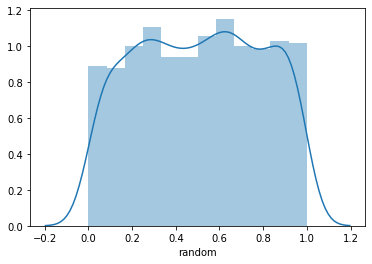

In [11]:
sns.distplot(randomKeys)

Even distribution implies insignifance/random.

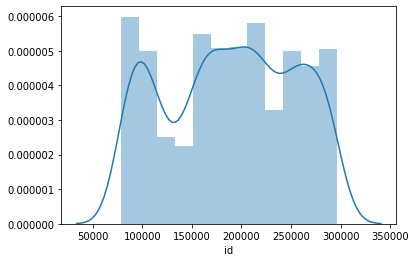

In [12]:
sns.distplot(patientIDs)

Another stab at looking for indication of session or visit date...

In [13]:
# normPatId = (patientIDs - patientIDs.mean()) / patientIDs.std()## z-normalise
normPatId = ((patientIDs - patientIDs.min()) / (patientIDs.min() - patientIDs.max()) + 1) * 12## z-normalise
normPatId.max()

12.0

In [14]:
normPatId.min()

0.0

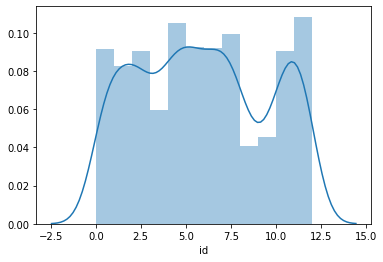

In [15]:
sns.distplot(normPatId)

Strange that patient IDs are modal. May hide more information.

Converting the data in excel, which is often used for data input, doesn't show any obvious patterns - especially since dates stretch hundreds of years into the future.

In [16]:
rawData["id"].describe()

count      1520.000000
mean     188365.022368
std       64355.870242
min       78261.000000
25%      137130.750000
50%      191344.500000
75%      244559.500000
max      295978.000000
Name: id, dtype: float64

Difficult to determine anything from the scale of these numbers.

count    1520.000000
mean        0.494279
std         0.295594
min         0.000000
25%         0.236171
50%         0.480594
75%         0.729604
max         1.000000
Name: id, dtype: float64

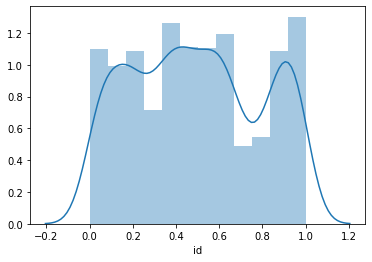

In [17]:
normalisedIds = (rawData["id"] - rawData["id"].min()) / (rawData["id"].min()-rawData["id"].max()) + 1
sns.distplot(normalisedIds)
normalisedIds.describe()

Min max normalisation between 0-1 to represent the spread more simply (via 25th, 50th and 75th percentiles) indicates mostly random.

A final check for randomness or at least no corellation with the output can be achieved with a heatmap:

       random      id indication diabetes  ihd hypertension arrhythmia  \
475  0.298074  173791        ASx       no  yes          yes         no   
523  0.460170  283846        CVA       no   no          yes        yes   

    history  ipsi contra    label  
475      no  70.0     55  Unknown  
523      no  95.0    100  Unknown  



Correlations:
           label    random        id
label   1.000000 -0.039527 -0.084549
random -0.039527  1.000000  0.053660
id     -0.084549  0.053660  1.000000


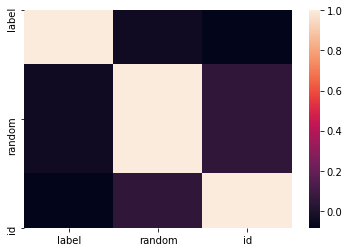

In [18]:
dfTemp = rawData.copy()
print(str(dfTemp[dfTemp["label"] == "Unknown"]) + "\n")
dfTemp = dfTemp.drop(index=[475, 523])
dfTemp = dfTemp.dropna()
dfTemp = dfTemp.replace(["yes","no", "Risk", "NoRisk"], [1, 0, 1, 0])
dfTemp = dfTemp[["label", "random", "id"]]
corr = dfTemp.corr()
# # Heatmap
print("\n\nCorrelations:\n" + str(dfTemp.corr()))
sns.heatmap(corr)

In [19]:
# https://stackoverflow.com/a/45507587
from scipy.stats import pearsonr 
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(dfTemp)

,label,random,id
label,0,0.1258,0.001
random,0.1258,0,0.0376
id,0.001,0.0376,0


https://www.investopedia.com/terms/p/p-value.asp

One commonly used p-value is 0.05. If the investor concludes that the p-value is less than 0.05, there is strong evidence against the null hypothesis. As a result, the investor would reject the null hypothesis and accept the alternative hypothesis.

Random is statistically significant.

<b style="color:red">The following columns have unexpected values:</b>

('Col: random', 'Expected: (1520, 1520)', 'Actual: 1222')

('Col: indication', 'Expected: (1, 4)', 'Actual: 5')

('Col: label', 'Expected: (1, 2)', 'Actual: 3')

In [20]:
## RANDOM Column
## Check for duplicates despite dictionary saying should be unique per record.
randomKeys[randomKeys.duplicated()]

1       0.602437
2       0.602437
10      0.678157
15      0.025356
19      0.065821
          ...   
1457    0.754513
1459    0.735681
1467    0.889219
1511    0.174637
1515    0.391440
Name: random, Length: 298, dtype: float64

There are 298 duplicate records, which is equal to the difference between the number of unique values and expected.

To check there is no significance, check if duplicated random codes are associated with same patient ids.

In [21]:
nonRandIds = rawData[["random", "id"]]
nonRandIds = nonRandIds[nonRandIds["random"].duplicated()]
nonRandIds

,random,id
1,0.602437,159284
2,0.602437,106066
10,0.678157,174588
15,0.025356,219417
19,0.065821,101248
...,...,...
1457,0.754513,293073
1459,0.735681,151183
1467,0.889219,202550
1511,0.174637,284804


<b style="color:red">Assume erroneous random column</b>

In [22]:
## INDICATION Column
ind = rawData["indication"]
ind.unique()

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

ASx and Asx present but presumably mean the same thing. Check count for each to indentify potential input error.

In [23]:
nASx = len(ind[ind =="ASx"])
nAsx = len(ind[ind =="Asx"])
print("nASx: " + str(nASx))
print("nAsx: " + str(nAsx))

nASx: 186
nAsx: 32


This is a concern because 32 isn't a one-off input error; it may be a seperate class.

<b style="color:red">Going by the given data dictionary, will assume it is the same class.</b>

In [24]:
## LABEL Column
labels = rawData["label"]
labels.unique()

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

Unknown is an additional class not mentioned in the given information.

Check count to assess impact it may have:

In [25]:
len(labels[labels == "Unknown"])

2

2 records with unknown classifications is insignificatant that it will probably be beneficial to remove them. However, it means any models will be unable to "sit on the fence", which is possibly a valid conclusion.

<b style="color: red">Remove unknown classifications.</b>

<p><b>Step 3. </b>Check for nan values.</p>

In [26]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
random          1520 non-null float64
id              1520 non-null int64
indication      1517 non-null object
diabetes        1518 non-null object
ihd             1520 non-null object
hypertension    1517 non-null object
arrhythmia      1520 non-null object
history         1518 non-null object
ipsi            1516 non-null float64
contra          1520 non-null object
label           1517 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 130.8+ KB


In [27]:
### NAN values
### Assess impact of nan values throughout data
colsWNa = rawData.columns[rawData.isna().any()].tolist()
print("The following columns have n nan  values")
for col in colsWNa:
    print("Column: " + col.upper() + " = " + str(len(rawData[rawData[col].isna() == True])))

The following columns have n nan  values
Column: INDICATION = 3
Column: DIABETES = 2
Column: HYPERTENSION = 3
Column: HISTORY = 2
Column: IPSI = 4
Column: LABEL = 3


In [28]:
nRecsBefore = rawData.shape[0]
tempDf = rawData.copy()
print(str(nRecsBefore) + " records before removing nan records.")
tempDf.dropna(inplace=True)
nRecsAfter = tempDf.shape[0]
print(str(nRecsAfter) + " records after removing nan records.")
nRemoved = nRecsBefore - nRecsAfter
print(str(nRemoved) + " records removed.")

1520 records before removing nan records.
1503 records after removing nan records.
17 records removed.


Depending on feature selection, nans affect a total of 17 records, which is ~1.1% of the all the data. It's could do more harm than good to impute these, but that can be explored.

<p><b>Step 4. </b>Check for duplicated records.</p>

In [29]:
duped = rawData[rawData.duplicated() == True]
nDupes = duped.shape[0]
print(str(nDupes) + " duplicate records found.")
if (nDupes > 0):
    print(dupes)

0 duplicate records found.


<b>Step 5.</b> Check distributions (except for random and id which, will be dropped).

In [30]:
rawData["contra"].unique()

array(['20 ', '60 ', '40', '85', '95', '100', '50', '50 ', '30 ', '40 ',
       '80', '25 ', '75 ', '10 ', '70 ', '15 ', '75', '35 ', '30', '80 ',
       '55 ', '100 ', '90', '85 ', '79', '45 ', '65 ', '90 ', '62', '53',
       '51 ', '70', '60', '35', '55', '16 ', '73 ', ' ', '10', '20', '65'],
      dtype=object)

Strangely, contra is formatted as a string, and there are empty strings that will become nan values when converted to numbers.

In [31]:
contraCol = pd.to_numeric(rawData["contra"], errors="coerce") ## https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas // Set " " to nan: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
contraCol.unique()

array([ 20.,  60.,  40.,  85.,  95., 100.,  50.,  30.,  80.,  25.,  75.,
        10.,  70.,  15.,  35.,  55.,  90.,  79.,  45.,  65.,  62.,  53.,
        51.,  16.,  73.,  nan])

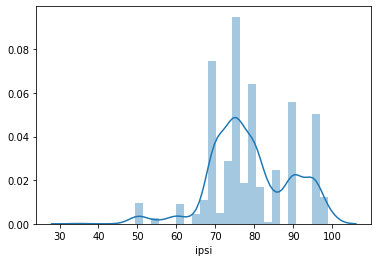

In [32]:
# ## Don't check binary cols i.e. yes/no etc.
# cols = ["ipsi", "contra", ] 
# for col in cols:
sns.distplot(rawData["ipsi"].dropna())
plt.show()

## HERE I discovered contra is formatted as a string and went back to change it.



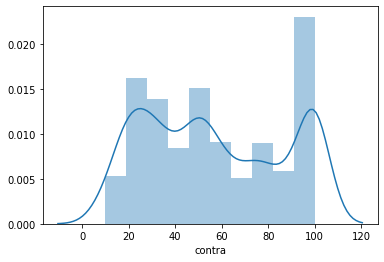

In [33]:
sns.distplot(contraCol.dropna())

Encode categorical cols to check their distribution. 

With the exception of label having "unknown"; they are all binary (yes:no, risk:norisk), so encode as binary, where:

yes:no == 1:0

risk:norisk == 1:0

In [34]:
dfTemp = rawData.copy()
# dfTemp = dfTemp.drop(columns=["random", "id"])
print(str(dfTemp[dfTemp["label"] == "Unknown"]) + "\n")
dfTemp = dfTemp.drop(index=[475, 523])
dfTemp = dfTemp.dropna()
dfTemp.info()

       random      id indication diabetes  ihd hypertension arrhythmia  \
475  0.298074  173791        ASx       no  yes          yes         no   
523  0.460170  283846        CVA       no   no          yes        yes   

    history  ipsi contra    label  
475      no  70.0     55  Unknown  
523      no  95.0    100  Unknown  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 0 to 1519
Data columns (total 11 columns):
random          1501 non-null float64
id              1501 non-null int64
indication      1501 non-null object
diabetes        1501 non-null object
ihd             1501 non-null object
hypertension    1501 non-null object
arrhythmia      1501 non-null object
history         1501 non-null object
ipsi            1501 non-null float64
contra          1501 non-null object
label           1501 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 140.7+ KB


In [35]:
for col in dfTemp.columns.values:
    dfTemp = dfTemp.replace(["yes", "Risk", "no", "NoRisk"], [1, 1, 0, 0]) ## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
    
dfTemp
dfTemp[dfTemp["label"] == 0]
# labels=dfTemp["label"]
# len(labels[labels == 0]) + len(labels[labels == 1])

,random,id,indication,diabetes,ihd,hypertension,arrhythmia,history,ipsi,contra,label
0,0.602437,218242,A-F,0,0,1,0,0,78.0,20,0
1,0.602437,159284,TIA,0,0,0,0,0,70.0,60,0
4,0.676862,245829,CVA,0,0,0,0,0,70.0,20,0
7,0.538333,261057,CVA,0,0,0,0,0,75.0,60,0
8,0.678157,256128,TIA,0,0,1,0,0,81.0,20,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,0.164733,167652,TIA,0,0,1,0,0,80.0,20,0
1515,0.391440,93406,A-F,0,1,0,0,0,76.0,60,0
1517,0.620373,101754,TIA,0,0,1,0,0,75.0,20,0
1518,0.639342,263836,A-F,0,1,0,0,0,70.0,45,0


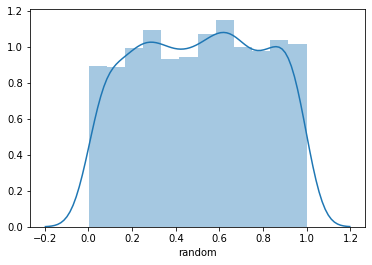

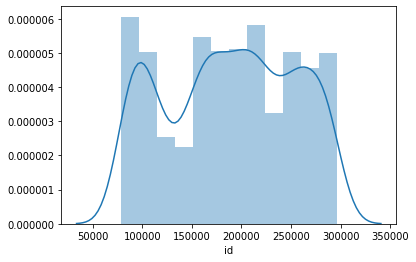

indication column failed to plot.


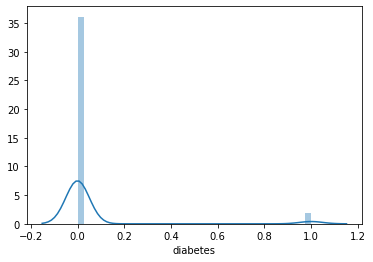

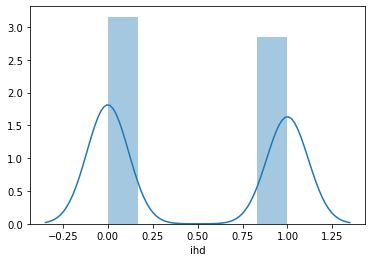

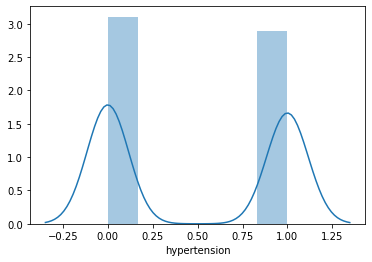

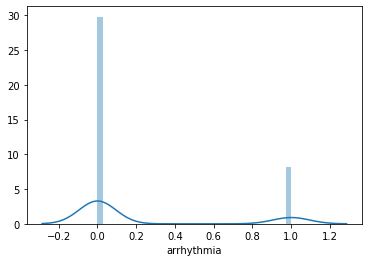

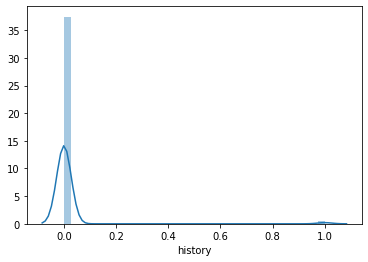

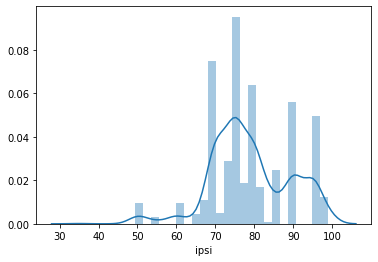

contra column failed to plot.


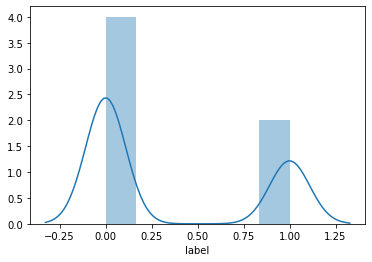

In [36]:
for col in dfTemp.columns.values:
    try:
        sns.distplot(dfTemp[col])
        plt.show()
    except:
        print(col + " column failed to plot.")
        pass

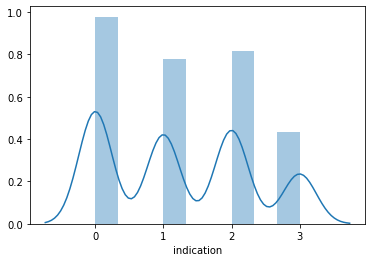

In [37]:
dfTemp = dfTemp.replace(["A-F", "TIA", "CVA", "ASx", "Asx"], [0, 1, 2, 3, 3]) ## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
sns.distplot(dfTemp["indication"])

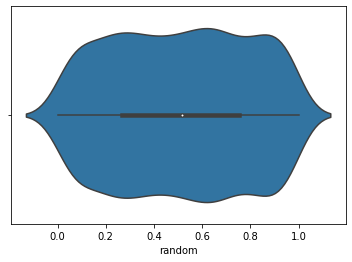

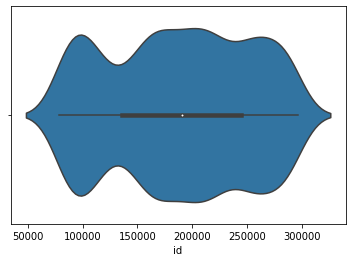

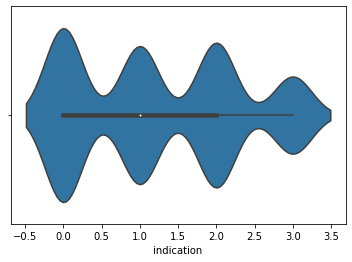

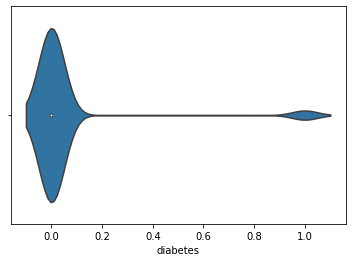

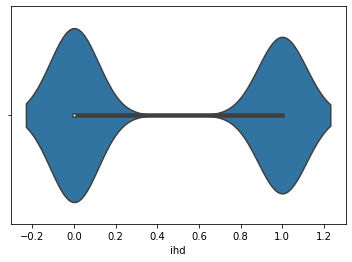

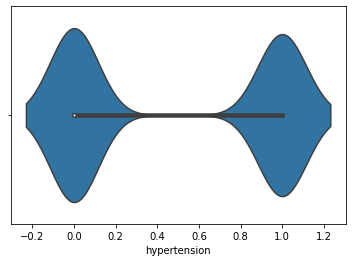

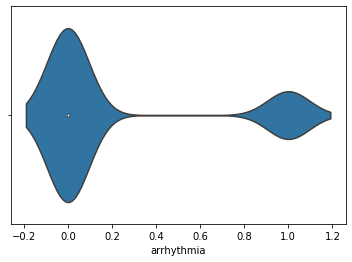

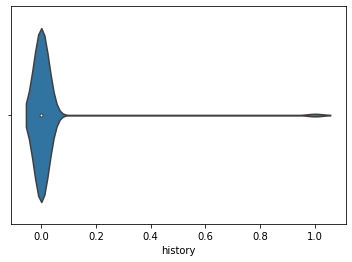

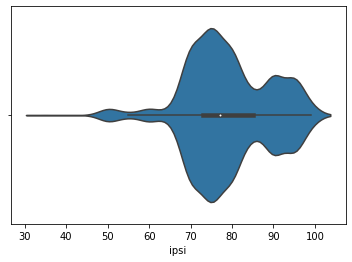

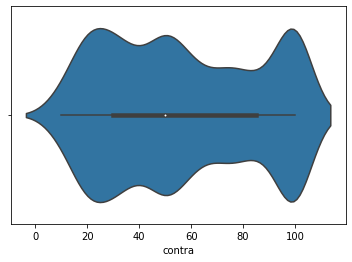

In [38]:
for col in dfTemp.columns.values:
    try:
        if (col != "label"):
            sns.violinplot(dfTemp[col],)
            plt.show()
    except:
#         print(col + " column failed to plot.") // Only contra should fail now
        sns.violinplot(contraCol)
        pass

<p><b>Step 6. </b>Look at ipsi and contra for outliers.</p>

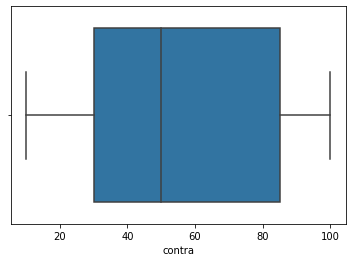

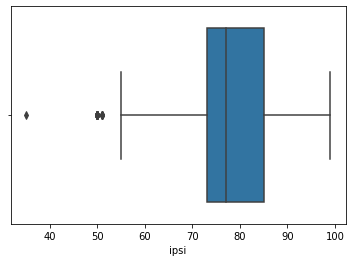

In [39]:
sns.boxplot(contraCol)
plt.show()
sns.boxplot(rawData["ipsi"])
plt.show()

Outliers in ipsi: explore further:

In [40]:
ipsi = dfTemp["ipsi"]
print(len(ipsi[ipsi < 60]))
print(len(ipsi[ipsi < 55]))
print(len(ipsi[ipsi < 40]))

40
31
1


31 patients between 40 and 55 ipsi is a fair few. The lone datapoint <40 feels like an outlier though. Could be indicative of cohort.

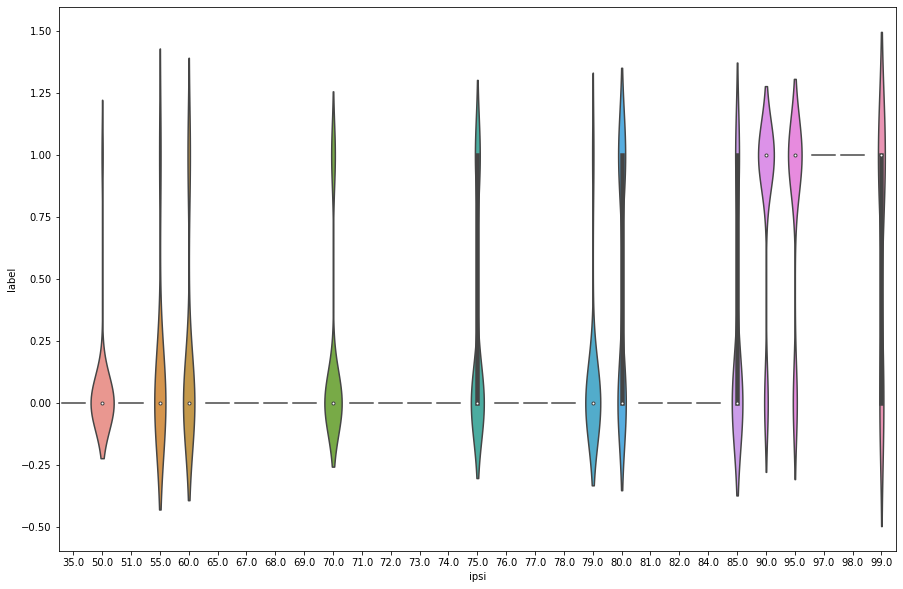

In [41]:
plt.figure(figsize=(15,10))
sns.violinplot(ipsi, dfTemp["label"])
# sns.violinplot(dfTemp["label"],ipsi)

The outlier (<40) seems to follow the general trend that lower ipsi == no risk.

<b style="color: red">Something to be done with ipsi outliers...</b> might not be necessary

<p><b>Step 7. </b>Look at each feature in relation to label.</p>

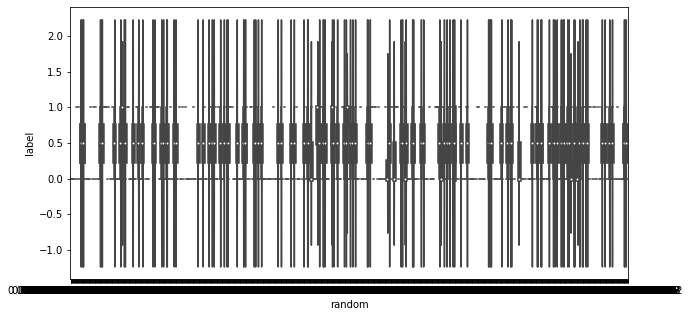

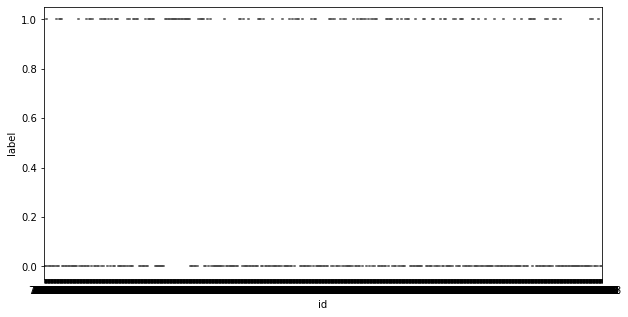

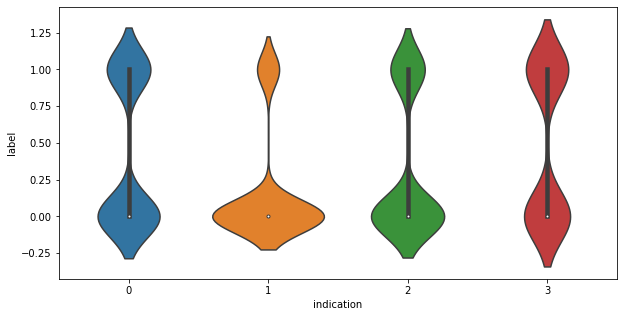

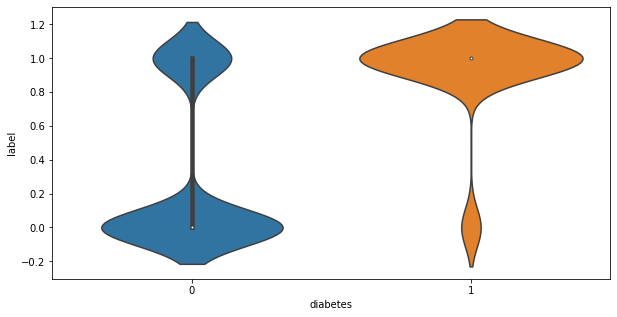

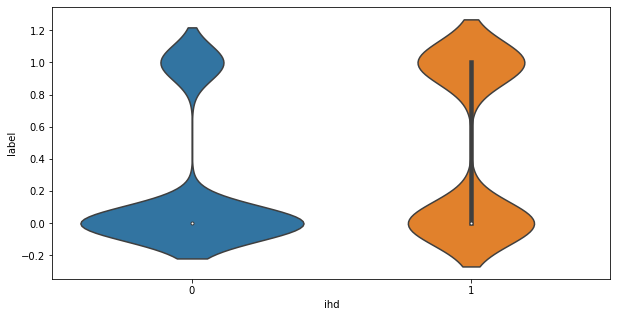

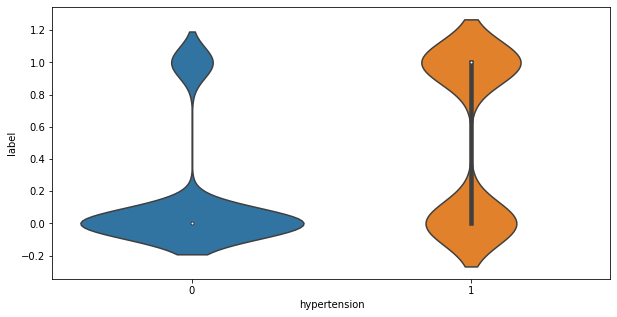

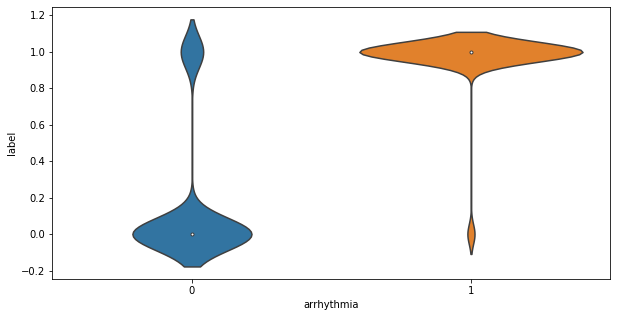

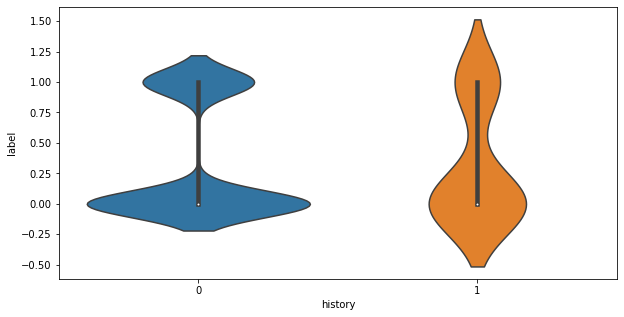

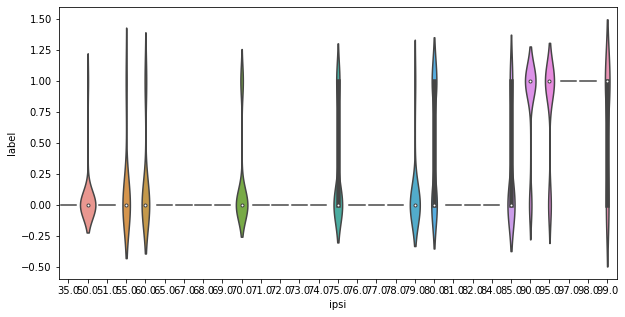

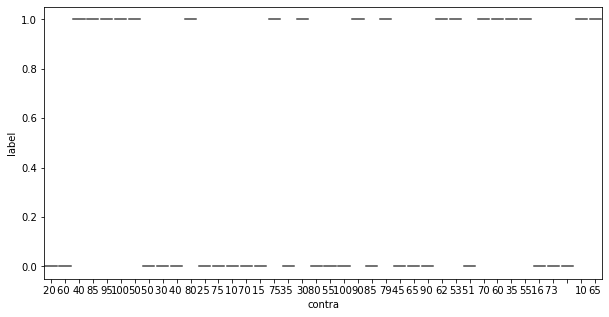

In [42]:
for col in dfTemp.columns.values:
    if (col != "label"):
        plt.figure(figsize=(10,5))
        sns.violinplot(dfTemp[col], dfTemp["label"])
        plt.show()

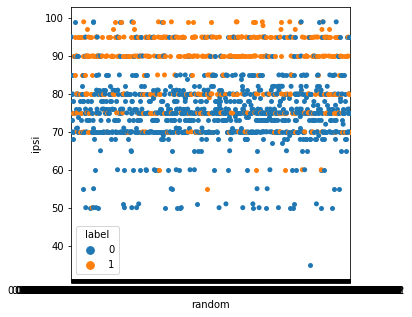

In [43]:
# sns.swarmplot(contraCol, hue=dfTemp["label"])
plt.figure(figsize=(5,5))
sns.swarmplot(y="ipsi", x="random", hue="label", data=dfTemp)

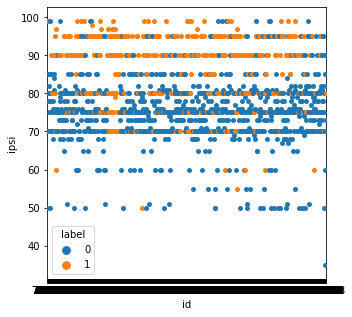

In [44]:
# sns.swarmplot(contraCol, hue=dfTemp["label"])
plt.figure(figsize=(5,5))
sns.swarmplot(y="ipsi", x="id", hue="label", data=dfTemp)

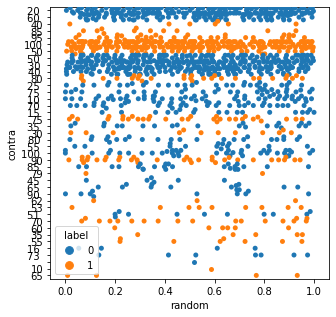

In [45]:
plt.figure(figsize=(5,5))
sns.swarmplot(y="contra", x="random", hue="label", data=dfTemp)

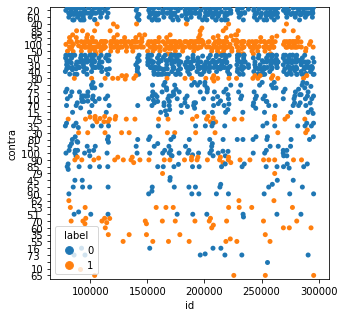

In [46]:
plt.figure(figsize=(5,5))
sns.swarmplot(y="contra", x="id", hue="label", data=dfTemp)

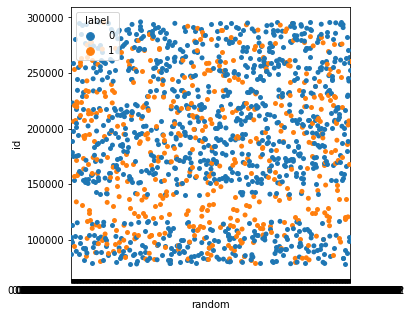

In [47]:
plt.figure(figsize=(5,5))
sns.swarmplot(y="id", x="random", hue="label", data=dfTemp)

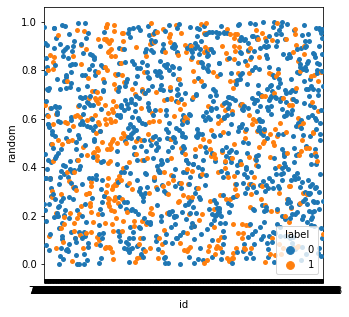

In [48]:
plt.figure(figsize=(5,5))
sns.swarmplot(y="random", x="id", hue="label", data=dfTemp)

Intersting: shows severay horizantal bands for risk and a single vertical band of seperation.

<p><b>Step 8. </b>Study correlations.</p>

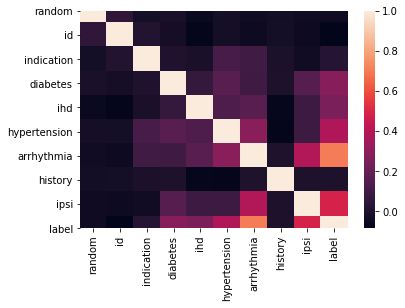

In [49]:
corr = dfTemp.corr()
# Heatmap
sns.heatmap(corr)

<a id="113"></a>
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.3. Data Preperation
<i style="font-size: 14px">The data preparation phase covers all activities to construct the final dataset from the initial raw data.</i>

<a href="#0">[back to top]</a>

<a id="114"></a>
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.4. Modeling
<i style="font-size: 14px">Modeling techniques are selected and applied.  Since some techniques like neural nets have specific requirements regarding the form of the data, there can be a loop back here to data prep.</i>

<a href="#0">[back to top]</a>

<a id="115"></a>
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.5. Evaluation
<i style="font-size: 14px">Once one or more models have been built that appear to have high quality based on whichever loss functions have been selected, these need to be tested to ensure they generalize against unseen data and that all key business issues have been sufficiently considered.  The end result is the selection of the champion model(s).</i>

<a href="#0">[back to top]</a>

<a id="116"></a>
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.5. Deployment
<i style="font-size: 14px">Generally this will mean deploying a code representation of the model into an operating system to score or categorize new unseen data as it arises and to create a mechanism for the use of that new information in the solution of the original business problem.  Importantly, the code representation must also include all the data prep steps leading up to modeling so that the model will treat new raw data in the same manner as during model development.

You may well observe that there is nothing special here and that’s largely true.  From today’s data science perspective this seems like common sense.  This is exactly the point.  The common process is so logical that it has become embedded into all our education, training, and practice.</i>

<a href="#0">[back to top]</a>

<a id="2"></a>
## &nbsp;&nbsp;&nbsp;&nbsp;2. Results
<i style="font-size: 14px">Results should include tables showing model performance with appropriately selected metrics. No rationale should be provided for this section - simply results of evaluative processes.

If using modified variants of the dataset, these should be clearly identified in the tables with appropriate naming. The justification and description of modification is not for this section.

Additional figures may be used as appropriate, in support of discussion points in the Evaluation & Discussion section, or as evidence for methodology following above.</i>

<a href="#0">[back to top]</a>

<a id="3"></a>
## &nbsp;&nbsp;&nbsp;&nbsp;3. Evaluation & Discussion
<i style="font-size: 14px">Evaluation methodology used for generating the results provided in the previous section. How were these evaluated? Why was this selected? What metrics were used and why?

Discussion of the results should be presented with appropriate evidence and rationale. E.g Which is the best model, and why? 

Consider each stage in the methodology, and reflect on any improvements which could have been made. Could any techniques have been used which may have improved performance? Why?</i>

<a href="#0">[back to top]</a>